In [39]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

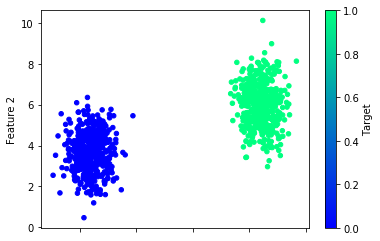

In [40]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [41]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [42]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [44]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [45]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [46]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [47]:
#1) To enhance the performance of our classification neural network,
#we’ll use the adam optimizer, which uses a gradient descent
#approach to ensure that the algorithm will not get stuck on
#weaker classifying variables and features.

#2) As for the loss function, we’ll use binary_crossentropy,
#which is specifically designed to evaluate a binary
#classification model.


# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [48]:
#TRAINING AND FITTING OUR MODEL 19.2.3

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 814us/step - loss: 0.7697 - accuracy: 0.1773
Epoch 2/100
24/24 [==============================] - 0s 790us/step - loss: 0.7579 - accuracy: 0.0507
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7477 - accuracy: 0.0867
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7395 - accuracy: 0.1200
Epoch 5/100
24/24 [==============================] - 0s 901us/step - loss: 0.7329 - accuracy: 0.1493
Epoch 6/100
24/24 [==============================] - 0s 835us/step - loss: 0.7272 - accuracy: 0.1707
Epoch 7/100
24/24 [==============================] - 0s 718us/step - loss: 0.7225 - accuracy: 0.1960
Epoch 8/100
24/24 [==============================] - 0s 785us/step - loss: 0.7184 - accuracy: 0.2200
Epoch 9/100
24/24 [==============================] - 0s 856us/step - loss: 0.7150 - accuracy: 0.2533
Epoch 10/100
24/24 [==============================] - 0s 730us/step - loss: 0.7119 - accuracy: 

24/24 [==============================] - 0s 733us/step - loss: 0.2065 - accuracy: 0.9867
Epoch 82/100
24/24 [==============================] - 0s 716us/step - loss: 0.2018 - accuracy: 0.9880
Epoch 83/100
24/24 [==============================] - 0s 778us/step - loss: 0.1971 - accuracy: 0.9893
Epoch 84/100
24/24 [==============================] - 0s 705us/step - loss: 0.1926 - accuracy: 0.9907
Epoch 85/100
24/24 [==============================] - 0s 697us/step - loss: 0.1882 - accuracy: 0.9920
Epoch 86/100
24/24 [==============================] - 0s 705us/step - loss: 0.1840 - accuracy: 0.9920
Epoch 87/100
24/24 [==============================] - 0s 666us/step - loss: 0.1798 - accuracy: 0.9920
Epoch 88/100
24/24 [==============================] - 0s 681us/step - loss: 0.1758 - accuracy: 0.9920
Epoch 89/100
24/24 [==============================] - 0s 699us/step - loss: 0.1719 - accuracy: 0.9933
Epoch 90/100
24/24 [==============================] - 0s 713us/step - loss: 0.1683 - accuracy: 

In [49]:
#loss metric = 0.07 and Predictive accuracy = 1.0
#from the above data we can see that slthough our model performace had
#more loss than the simulation data, the model correctly classifies
#all of our training data, which is sufficient for our needs.

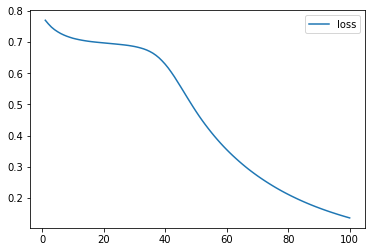

In [50]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

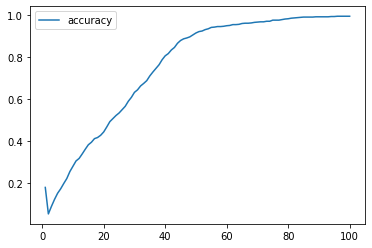

In [51]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1347 - accuracy: 0.9960
Loss: 0.13471068441867828, Accuracy: 0.9959999918937683


In [53]:
#Now that we have a trained neural network model and we
#have verified its performance using a test dataset, we
#can apply this model to novel datasets and predict the
#classification of a data point

# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

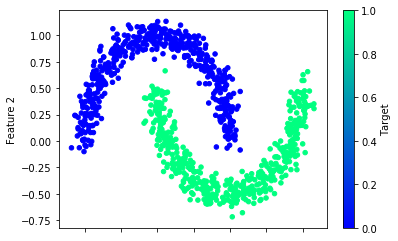

In [54]:
#---19.2.4 Nuances of Neaural Networks on Nonlinear Numbers---
# testing the limits of the basic neural network

#generate some new dummy data. This time we’ll generate some
#nonlinear moon-shaped data using Scikit-learn’s make_moons
#method and visualize it using Pandas and Matplotlib.

from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [55]:
#As with our previous dummy data example, we need to
#split our nonlinear data into training and testing
#datasets and normalize our datasets.


# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [56]:
#we’ll train our neural network model using the fit
#method on the nonlinear training data


# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 963us/step - loss: 1.2969 - accuracy: 0.3427
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1539 - accuracy: 0.3573
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0548 - accuracy: 0.3773
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9891 - accuracy: 0.3933
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9386 - accuracy: 0.4093
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9002 - accuracy: 0.4293
Epoch 7/100
24/24 [==============================] - 0s 835us/step - loss: 0.8687 - accuracy: 0.4400
Epoch 8/100
24/24 [==============================] - 0s 905us/step - loss: 0.8414 - accuracy: 0.4453
Epoch 9/100
24/24 [==============================] - 0s 797us/step - loss: 0.8175 - accuracy: 0.4533
Epoch 10/100
24/24 [==============================] - 0s 913us/step - loss: 0.7953 - accuracy: 0.4640

24/24 [==============================] - 0s 827us/step - loss: 0.4032 - accuracy: 0.8080
Epoch 82/100
24/24 [==============================] - 0s 848us/step - loss: 0.3999 - accuracy: 0.8133
Epoch 83/100
24/24 [==============================] - 0s 759us/step - loss: 0.3968 - accuracy: 0.8160
Epoch 84/100
24/24 [==============================] - 0s 792us/step - loss: 0.3935 - accuracy: 0.8173
Epoch 85/100
24/24 [==============================] - 0s 777us/step - loss: 0.3905 - accuracy: 0.8240
Epoch 86/100
24/24 [==============================] - 0s 777us/step - loss: 0.3873 - accuracy: 0.8267
Epoch 87/100
24/24 [==============================] - 0s 790us/step - loss: 0.3843 - accuracy: 0.8293
Epoch 88/100
24/24 [==============================] - 0s 794us/step - loss: 0.3810 - accuracy: 0.8293
Epoch 89/100
24/24 [==============================] - 0s 793us/step - loss: 0.3779 - accuracy: 0.8320
Epoch 90/100
24/24 [==============================] - 0s 754us/step - loss: 0.3748 - accuracy: 

In [57]:
#TensorFlow stopped training the model after 84 epochs
#because the loss metric was no longer decreasing at
#a substantial rate, and the accuracy was not improving.

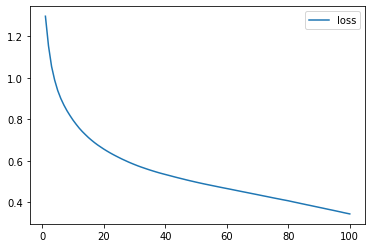

In [58]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

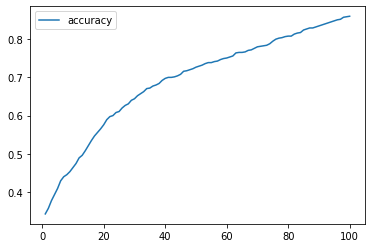

In [59]:
# Plot the loss
history_df.plot(y="accuracy")

In [60]:
#According to the accuracy metric, the basic
#single-neuron, single-layer neural network
#model was only able to correctly classify
#89% of all data points in the nonlinear training data.

In [61]:
#in many industrial and medical use cases, a model’s
#classification accuracy must exceed 95% or even 99%.
#In these cases, we wouldn’t be satisfied with the basic
#single-neuron, single-layer neural network model, and we
#would have to design a more robust neural network

In [62]:
#19.2.5 Create the Connective Tissue, the Multiple-Neuron Neural Network

#RMK: A good rule of thumb for a basic neural network is:
#to have two to three times the amount of neurons in the
#hidden layer as the number of inputs.

In [63]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [64]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [65]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 882us/step - loss: 0.7405 - accuracy: 0.2720
Epoch 2/100
24/24 [==============================] - 0s 864us/step - loss: 0.7026 - accuracy: 0.3080
Epoch 3/100
24/24 [==============================] - 0s 869us/step - loss: 0.6685 - accuracy: 0.4400
Epoch 4/100
24/24 [==============================] - 0s 805us/step - loss: 0.6384 - accuracy: 0.6667
Epoch 5/100
24/24 [==============================] - 0s 818us/step - loss: 0.6124 - accuracy: 0.7787
Epoch 6/100
24/24 [==============================] - 0s 790us/step - loss: 0.5878 - accuracy: 0.8147
Epoch 7/100
24/24 [==============================] - 0s 747us/step - loss: 0.5642 - accuracy: 0.8373
Epoch 8/100
24/24 [==============================] - 0s 746us/step - loss: 0.5413 - accuracy: 0.8533
Epoch 9/100
24/24 [==============================] - 0s 784us/step - loss: 0.5194 - accuracy: 0.8613
Epoch 10/100
24/24 [==============================] - 0s 917us/step - loss: 0.4985 - accura

24/24 [==============================] - 0s 714us/step - loss: 0.2065 - accuracy: 0.9080
Epoch 82/100
24/24 [==============================] - 0s 713us/step - loss: 0.2052 - accuracy: 0.9093
Epoch 83/100
24/24 [==============================] - 0s 664us/step - loss: 0.2039 - accuracy: 0.9107
Epoch 84/100
24/24 [==============================] - 0s 716us/step - loss: 0.2026 - accuracy: 0.9120
Epoch 85/100
24/24 [==============================] - 0s 696us/step - loss: 0.2013 - accuracy: 0.9120
Epoch 86/100
24/24 [==============================] - 0s 692us/step - loss: 0.2002 - accuracy: 0.9107
Epoch 87/100
24/24 [==============================] - 0s 653us/step - loss: 0.1989 - accuracy: 0.9120
Epoch 88/100
24/24 [==============================] - 0s 684us/step - loss: 0.1975 - accuracy: 0.9147
Epoch 89/100
24/24 [==============================] - 0s 678us/step - loss: 0.1963 - accuracy: 0.9147
Epoch 90/100
24/24 [==============================] - 0s 676us/step - loss: 0.1949 - accuracy: 

In [66]:
#as we increase the number of neurons within the hidden layer,
#the classification accuracy improves

In [67]:
#19.2.6 Give Your Model a Synaptic Boost

#There are a few means of optimizing a neural network:

#1. Check out your input dataset.
#2. Add more neurons to a hidden layer.
#3. Add additional hidden layers.
#4. Use a different activation function for the hidden layers.
#5. Add additional epochs to the training regimen.

In [68]:
#SKILL DRILL:Try plotting a variable using Pandas’ Series.plot
#method to look for outliers that can help identify if a
#particular numerical variable is causing confusion in a model.
#Try leaving out a noisy variable from the rest of the training
#features and see if the model performs better.


In [69]:
#Use a Different Activation Function

#1. The sigmoid function values are normalized to a
#probability between 0 and 1, which is ideal for binary classification.

#2. The tanh function can be used for classification or regression,
#and it expands the range between -1 and 1.

#3. The ReLU function is ideal for looking at positive nonlinear input
#data for classification or regression.

#4. The Leaky ReLU function is a good alternative for nonlinear input
#data with many negative inputs.

In [70]:
#Go ahead and use the TensorFlow Playground and dummy datasets to practice building basic neural networks. In addition, try saving multiple neural network models in the same script and compare the performance of each model, asking the following questions:

#1. What is the accuracy of my model? Is it acceptable or does it need
#to be higher?

#2. How long did it take to train my model? How many minutes or hours?
#How many epochs?

#3. Does it look like my model is as complex as my input data?
#These reflective questions will help you identify what steps
#are needed to make your neural network (and other machine
#learning and statistical) models even better!